# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [1]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

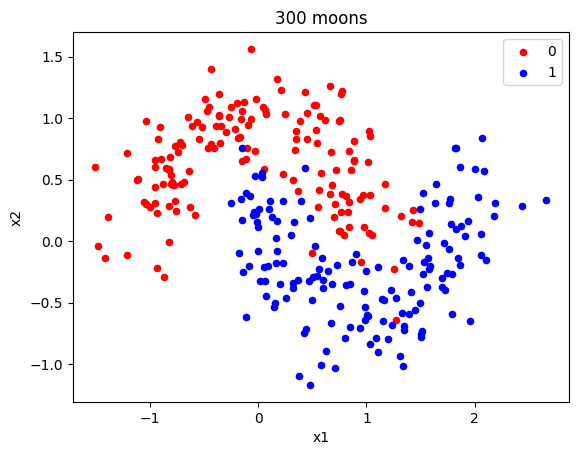

In [2]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

In [3]:
import numpy as np

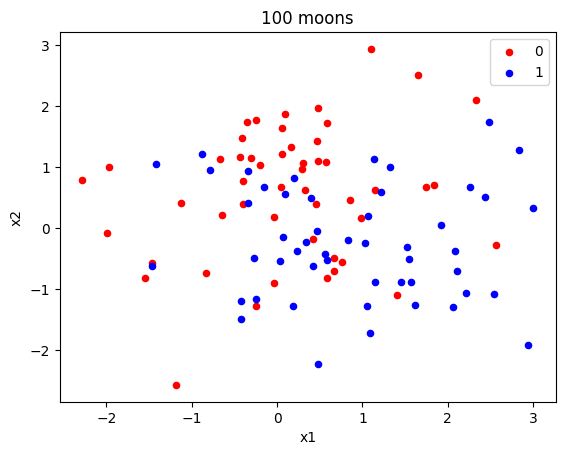

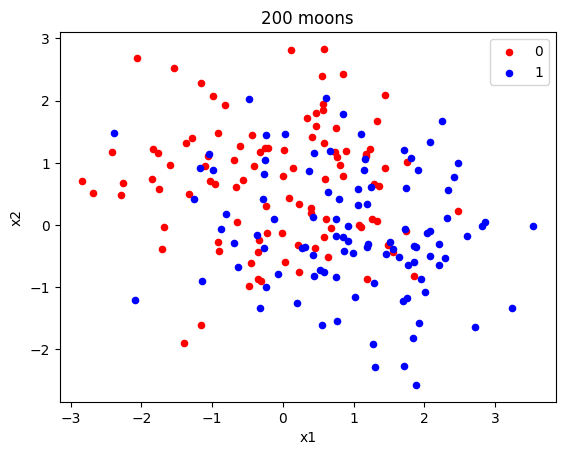

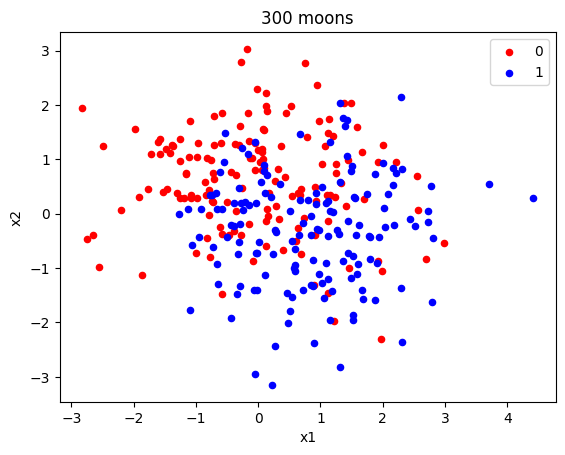

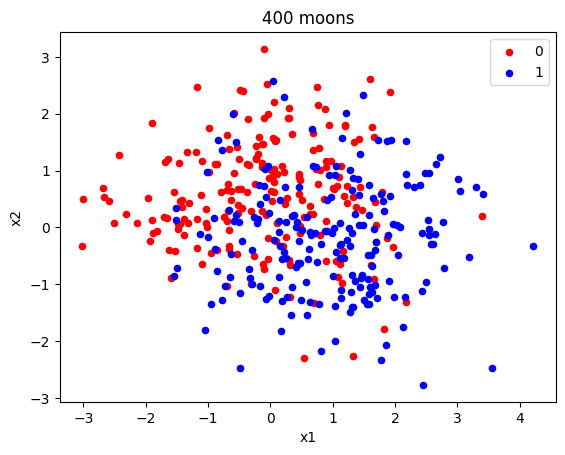

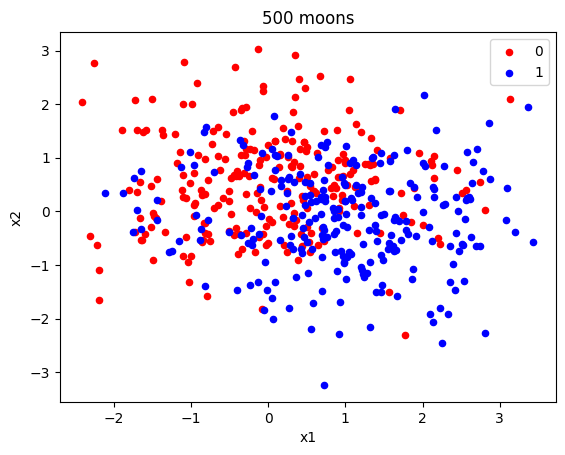

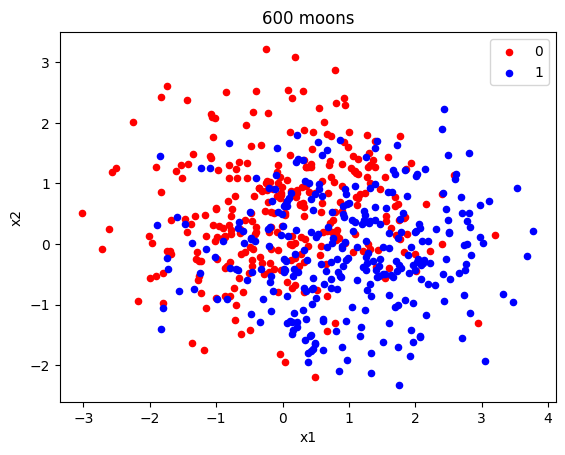

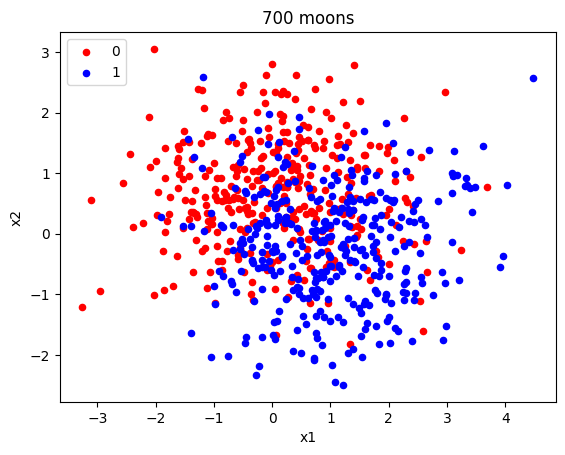

In [4]:
moons = [100,200,300,400,500,600,700]

for moon in moons:
    X, y = make_moons(n_samples=moon, noise=0.9, random_state=0)
    plot_moons(X,y)    

❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [5]:
X, y = make_moons(n_samples=250, noise=0.2, random_state=0)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((175, 2), (75, 2), (175,), (75,))

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [9]:
from tensorflow.keras import models, layers

2023-02-20 14:10:10.585164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    
    model = models.Sequential()
    model.add(layers.Dense(5, input_dim=2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
        
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

2023-02-20 14:10:18.619508: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set! 

Store the results of the training into a `history` variable. ❓

In [12]:
model = initialize_model()

In [13]:
history = model.fit(X_train, y_train, epochs=100, batch_size = 8, verbose=1)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.6757 - accuracy: 0.7257
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.7486
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.7600
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.7714
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.7943
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.7943
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.7943
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7943
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.7943
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5649 - accuracy: 0.8000
Epoch 11/

22/22 [==============================] - 0s 1ms/step - loss: 0.2926 - accuracy: 0.8686
Epoch 84/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.8686
Epoch 85/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2913 - accuracy: 0.8686
Epoch 86/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2906 - accuracy: 0.8686
Epoch 87/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2900 - accuracy: 0.8686
Epoch 88/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2894 - accuracy: 0.8743
Epoch 89/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2888 - accuracy: 0.8743
Epoch 90/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.8743
Epoch 91/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2876 - accuracy: 0.8743
Epoch 92/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2871 - accuracy: 0.8743
Epoch 93/100


👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [14]:
history.history

{'loss': [0.6756649613380432,
  0.6629764437675476,
  0.6507989168167114,
  0.6386638283729553,
  0.6268298625946045,
  0.6145598292350769,
  0.6026477217674255,
  0.5901197791099548,
  0.5777192711830139,
  0.56486976146698,
  0.5523271560668945,
  0.5402193069458008,
  0.52750563621521,
  0.5155545473098755,
  0.5032247304916382,
  0.4911659359931946,
  0.478913277387619,
  0.4675656855106354,
  0.4559340178966522,
  0.4448923170566559,
  0.4342353940010071,
  0.42487210035324097,
  0.41479426622390747,
  0.4063452482223511,
  0.3983289897441864,
  0.39092594385147095,
  0.3844878673553467,
  0.37864381074905396,
  0.3729555010795593,
  0.367756187915802,
  0.3630381226539612,
  0.3587723970413208,
  0.35494568943977356,
  0.35154256224632263,
  0.3482360243797302,
  0.34526944160461426,
  0.34228748083114624,
  0.339737206697464,
  0.33734357357025146,
  0.335214763879776,
  0.33330047130584717,
  0.3311712443828583,
  0.32961106300354004,
  0.3277437090873718,
  0.3262025713920593,

❓ Plot the history of the train loss using the following function ❓

In [17]:
def plot_history(history):
    plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

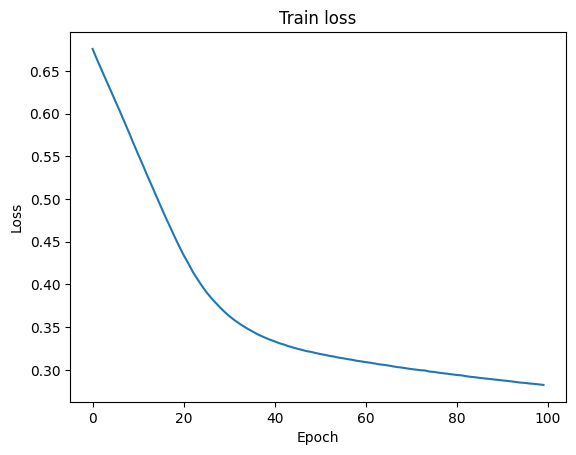

In [18]:
plot_history(history)

❓ What do you observe ❓

> YOUR ANSWER HERE

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [19]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [20]:
res = model.evaluate(X_test, y_test, verbose=0)

res

[0.2859971821308136, 0.8533333539962769]

In [21]:
loss = res[0]
accuracy = res[1]

**🧪 Test your code**

In [22]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-your-first-neural-network/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

In [23]:
from utils.plots import plot_decision_regions

1940/1940 [==============================] - 2s 927us/step


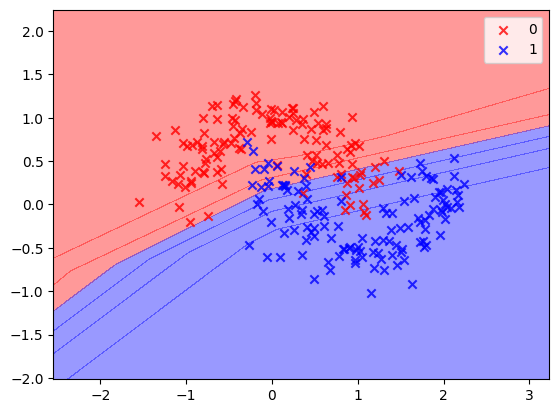

In [24]:
plot_decision_regions(X,y,model)

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [25]:
model2 = initialize_model()

In [26]:
history = model2.fit(X_train, y_train,validation_split=0.3, epochs=500, batch_size = 8, verbose=1)

Epoch 1/500
16/16 [==============================] - 1s 16ms/step - loss: 0.7747 - accuracy: 0.2951 - val_loss: 0.7499 - val_accuracy: 0.3774
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7605 - accuracy: 0.3279 - val_loss: 0.7394 - val_accuracy: 0.3774
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7472 - accuracy: 0.3607 - val_loss: 0.7296 - val_accuracy: 0.3774
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7358 - accuracy: 0.4098 - val_loss: 0.7206 - val_accuracy: 0.4151
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7224 - accuracy: 0.4098 - val_loss: 0.7079 - val_accuracy: 0.4717
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7067 - accuracy: 0.4836 - val_loss: 0.6947 - val_accuracy: 0.6792
Epoch 7/500
16/16 [==============================] - 0s 6ms/step - loss: 0.6898 - accuracy: 0.5902 - val_loss: 0.6823 - val_accuracy: 0.7170
Epoch 8/500


Epoch 59/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3628 - accuracy: 0.8115 - val_loss: 0.3790 - val_accuracy: 0.8491
Epoch 60/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.8115 - val_loss: 0.3761 - val_accuracy: 0.8491
Epoch 61/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.8115 - val_loss: 0.3741 - val_accuracy: 0.8491
Epoch 62/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.8115 - val_loss: 0.3717 - val_accuracy: 0.8491
Epoch 63/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.8115 - val_loss: 0.3698 - val_accuracy: 0.8491
Epoch 64/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3534 - accuracy: 0.8115 - val_loss: 0.3675 - val_accuracy: 0.8491
Epoch 65/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.8115 - val_loss: 0.3661 - val_accuracy: 0.8491
Epoch 

16/16 [==============================] - 0s 4ms/step - loss: 0.3021 - accuracy: 0.8689 - val_loss: 0.3201 - val_accuracy: 0.8679
Epoch 117/500
16/16 [==============================] - 0s 4ms/step - loss: 0.3015 - accuracy: 0.8689 - val_loss: 0.3197 - val_accuracy: 0.8679
Epoch 118/500
16/16 [==============================] - 0s 4ms/step - loss: 0.3010 - accuracy: 0.8689 - val_loss: 0.3197 - val_accuracy: 0.8679
Epoch 119/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3006 - accuracy: 0.8689 - val_loss: 0.3195 - val_accuracy: 0.8679
Epoch 120/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3000 - accuracy: 0.8689 - val_loss: 0.3190 - val_accuracy: 0.8679
Epoch 121/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2995 - accuracy: 0.8689 - val_loss: 0.3181 - val_accuracy: 0.8679
Epoch 122/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2990 - accuracy: 0.8689 - val_loss: 0.3179 - val_accuracy: 0.8679
Epoch 123/500

16/16 [==============================] - 0s 5ms/step - loss: 0.2843 - accuracy: 0.8770 - val_loss: 0.3115 - val_accuracy: 0.8679
Epoch 174/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2838 - accuracy: 0.8770 - val_loss: 0.3111 - val_accuracy: 0.8679
Epoch 175/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2836 - accuracy: 0.8770 - val_loss: 0.3111 - val_accuracy: 0.8679
Epoch 176/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2838 - accuracy: 0.8770 - val_loss: 0.3113 - val_accuracy: 0.8679
Epoch 177/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2835 - accuracy: 0.8689 - val_loss: 0.3106 - val_accuracy: 0.8679
Epoch 178/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2829 - accuracy: 0.8689 - val_loss: 0.3106 - val_accuracy: 0.8679
Epoch 179/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2828 - accuracy: 0.8689 - val_loss: 0.3106 - val_accuracy: 0.8679
Epoch 180/500

16/16 [==============================] - 0s 3ms/step - loss: 0.2749 - accuracy: 0.8607 - val_loss: 0.3087 - val_accuracy: 0.8868
Epoch 231/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2749 - accuracy: 0.8607 - val_loss: 0.3090 - val_accuracy: 0.8868
Epoch 232/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2748 - accuracy: 0.8607 - val_loss: 0.3087 - val_accuracy: 0.8868
Epoch 233/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.8607 - val_loss: 0.3085 - val_accuracy: 0.8868
Epoch 234/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2744 - accuracy: 0.8607 - val_loss: 0.3085 - val_accuracy: 0.8868
Epoch 235/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.8689 - val_loss: 0.3082 - val_accuracy: 0.8868
Epoch 236/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2742 - accuracy: 0.8689 - val_loss: 0.3082 - val_accuracy: 0.8868
Epoch 237/500

16/16 [==============================] - 0s 3ms/step - loss: 0.2653 - accuracy: 0.8770 - val_loss: 0.3075 - val_accuracy: 0.8868
Epoch 288/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2652 - accuracy: 0.8770 - val_loss: 0.3075 - val_accuracy: 0.8868
Epoch 289/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2651 - accuracy: 0.8770 - val_loss: 0.3076 - val_accuracy: 0.8868
Epoch 290/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2647 - accuracy: 0.8770 - val_loss: 0.3074 - val_accuracy: 0.8868
Epoch 291/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2646 - accuracy: 0.8770 - val_loss: 0.3075 - val_accuracy: 0.8868
Epoch 292/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2646 - accuracy: 0.8770 - val_loss: 0.3074 - val_accuracy: 0.8868
Epoch 293/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2641 - accuracy: 0.8770 - val_loss: 0.3074 - val_accuracy: 0.8868
Epoch 294/500

16/16 [==============================] - 0s 3ms/step - loss: 0.2507 - accuracy: 0.9098 - val_loss: 0.3045 - val_accuracy: 0.8868
Epoch 345/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2507 - accuracy: 0.9098 - val_loss: 0.3044 - val_accuracy: 0.8868
Epoch 346/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2506 - accuracy: 0.9098 - val_loss: 0.3045 - val_accuracy: 0.8868
Epoch 347/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.9098 - val_loss: 0.3044 - val_accuracy: 0.8868
Epoch 348/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.9016 - val_loss: 0.3044 - val_accuracy: 0.8868
Epoch 349/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2495 - accuracy: 0.9098 - val_loss: 0.3043 - val_accuracy: 0.8868
Epoch 350/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2493 - accuracy: 0.9098 - val_loss: 0.3042 - val_accuracy: 0.8868
Epoch 351/500

16/16 [==============================] - 0s 3ms/step - loss: 0.2371 - accuracy: 0.9016 - val_loss: 0.2992 - val_accuracy: 0.8868
Epoch 402/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2371 - accuracy: 0.9098 - val_loss: 0.2990 - val_accuracy: 0.8868
Epoch 403/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2371 - accuracy: 0.9098 - val_loss: 0.2988 - val_accuracy: 0.8868
Epoch 404/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2365 - accuracy: 0.9098 - val_loss: 0.2987 - val_accuracy: 0.8868
Epoch 405/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2365 - accuracy: 0.9098 - val_loss: 0.2985 - val_accuracy: 0.8868
Epoch 406/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2363 - accuracy: 0.9098 - val_loss: 0.2983 - val_accuracy: 0.8868
Epoch 407/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2361 - accuracy: 0.9098 - val_loss: 0.2983 - val_accuracy: 0.8868
Epoch 408/500

16/16 [==============================] - 0s 3ms/step - loss: 0.2276 - accuracy: 0.9098 - val_loss: 0.2940 - val_accuracy: 0.8868
Epoch 459/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9098 - val_loss: 0.2939 - val_accuracy: 0.8868
Epoch 460/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9098 - val_loss: 0.2939 - val_accuracy: 0.8868
Epoch 461/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2272 - accuracy: 0.9098 - val_loss: 0.2939 - val_accuracy: 0.8868
Epoch 462/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2271 - accuracy: 0.9098 - val_loss: 0.2939 - val_accuracy: 0.8868
Epoch 463/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2269 - accuracy: 0.9098 - val_loss: 0.2940 - val_accuracy: 0.8868
Epoch 464/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2269 - accuracy: 0.9098 - val_loss: 0.2940 - val_accuracy: 0.8868
Epoch 465/500

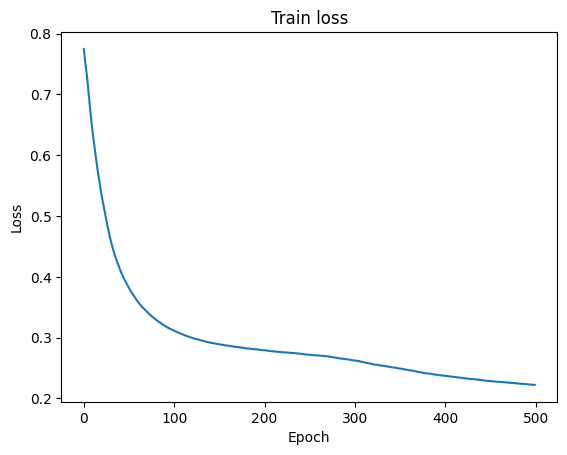

In [27]:
plot_history(history)

❓ Did the test accuracy improve? ❓

In [28]:
res = model.evaluate(X_test, y_test, verbose=0)
res

[0.2859971821308136, 0.8533333539962769]

<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [29]:
def initialize_model_2():
    
    #############################
    #  1 - Model architecture   #
    #############################   
    
    model = models.Sequential()
    
    model.add(layers.Dense(20, input_dim=2, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

In [30]:
model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                60        
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

In [32]:
model = initialize_model_2()

history = model.fit(
            X_train, y_train,
            validation_split=0.3,
            epochs=500,
            batch_size=8,
            verbose=2)

Epoch 1/500
16/16 - 1s - loss: 0.6918 - accuracy: 0.6066 - val_loss: 0.6728 - val_accuracy: 0.6415 - 927ms/epoch - 58ms/step
Epoch 2/500
16/16 - 0s - loss: 0.6487 - accuracy: 0.7869 - val_loss: 0.6283 - val_accuracy: 0.7736 - 52ms/epoch - 3ms/step
Epoch 3/500
16/16 - 0s - loss: 0.6060 - accuracy: 0.8197 - val_loss: 0.5866 - val_accuracy: 0.7736 - 57ms/epoch - 4ms/step
Epoch 4/500
16/16 - 0s - loss: 0.5680 - accuracy: 0.8279 - val_loss: 0.5503 - val_accuracy: 0.8113 - 54ms/epoch - 3ms/step
Epoch 5/500
16/16 - 0s - loss: 0.5320 - accuracy: 0.8279 - val_loss: 0.5119 - val_accuracy: 0.7925 - 58ms/epoch - 4ms/step
Epoch 6/500
16/16 - 0s - loss: 0.4958 - accuracy: 0.8197 - val_loss: 0.4785 - val_accuracy: 0.7925 - 54ms/epoch - 3ms/step
Epoch 7/500
16/16 - 0s - loss: 0.4641 - accuracy: 0.8279 - val_loss: 0.4483 - val_accuracy: 0.8302 - 56ms/epoch - 3ms/step
Epoch 8/500
16/16 - 0s - loss: 0.4342 - accuracy: 0.8279 - val_loss: 0.4197 - val_accuracy: 0.8491 - 53ms/epoch - 3ms/step
Epoch 9/500
16

Epoch 68/500
16/16 - 0s - loss: 0.1461 - accuracy: 0.9508 - val_loss: 0.2201 - val_accuracy: 0.9057 - 56ms/epoch - 3ms/step
Epoch 69/500
16/16 - 0s - loss: 0.1458 - accuracy: 0.9508 - val_loss: 0.2174 - val_accuracy: 0.8868 - 53ms/epoch - 3ms/step
Epoch 70/500
16/16 - 0s - loss: 0.1422 - accuracy: 0.9508 - val_loss: 0.2153 - val_accuracy: 0.8868 - 54ms/epoch - 3ms/step
Epoch 71/500
16/16 - 0s - loss: 0.1411 - accuracy: 0.9508 - val_loss: 0.2147 - val_accuracy: 0.9057 - 52ms/epoch - 3ms/step
Epoch 72/500
16/16 - 0s - loss: 0.1395 - accuracy: 0.9590 - val_loss: 0.2151 - val_accuracy: 0.9057 - 50ms/epoch - 3ms/step
Epoch 73/500
16/16 - 0s - loss: 0.1375 - accuracy: 0.9590 - val_loss: 0.2138 - val_accuracy: 0.9057 - 53ms/epoch - 3ms/step
Epoch 74/500
16/16 - 0s - loss: 0.1382 - accuracy: 0.9508 - val_loss: 0.2132 - val_accuracy: 0.9057 - 52ms/epoch - 3ms/step
Epoch 75/500
16/16 - 0s - loss: 0.1325 - accuracy: 0.9590 - val_loss: 0.2063 - val_accuracy: 0.9057 - 52ms/epoch - 3ms/step
Epoch 76

Epoch 134/500
16/16 - 0s - loss: 0.0613 - accuracy: 0.9754 - val_loss: 0.1434 - val_accuracy: 0.9245 - 51ms/epoch - 3ms/step
Epoch 135/500
16/16 - 0s - loss: 0.0609 - accuracy: 0.9754 - val_loss: 0.1484 - val_accuracy: 0.9245 - 52ms/epoch - 3ms/step
Epoch 136/500
16/16 - 0s - loss: 0.0606 - accuracy: 0.9836 - val_loss: 0.1467 - val_accuracy: 0.9245 - 50ms/epoch - 3ms/step
Epoch 137/500
16/16 - 0s - loss: 0.0590 - accuracy: 0.9754 - val_loss: 0.1446 - val_accuracy: 0.9245 - 52ms/epoch - 3ms/step
Epoch 138/500
16/16 - 0s - loss: 0.0585 - accuracy: 0.9754 - val_loss: 0.1461 - val_accuracy: 0.9245 - 51ms/epoch - 3ms/step
Epoch 139/500
16/16 - 0s - loss: 0.0575 - accuracy: 0.9754 - val_loss: 0.1432 - val_accuracy: 0.9245 - 51ms/epoch - 3ms/step
Epoch 140/500
16/16 - 0s - loss: 0.0573 - accuracy: 0.9754 - val_loss: 0.1451 - val_accuracy: 0.9245 - 51ms/epoch - 3ms/step
Epoch 141/500
16/16 - 0s - loss: 0.0587 - accuracy: 0.9754 - val_loss: 0.1458 - val_accuracy: 0.9245 - 51ms/epoch - 3ms/step


Epoch 200/500
16/16 - 0s - loss: 0.0342 - accuracy: 0.9918 - val_loss: 0.1454 - val_accuracy: 0.9434 - 52ms/epoch - 3ms/step
Epoch 201/500
16/16 - 0s - loss: 0.0338 - accuracy: 1.0000 - val_loss: 0.1461 - val_accuracy: 0.9434 - 54ms/epoch - 3ms/step
Epoch 202/500
16/16 - 0s - loss: 0.0331 - accuracy: 1.0000 - val_loss: 0.1442 - val_accuracy: 0.9434 - 52ms/epoch - 3ms/step
Epoch 203/500
16/16 - 0s - loss: 0.0334 - accuracy: 1.0000 - val_loss: 0.1505 - val_accuracy: 0.9434 - 53ms/epoch - 3ms/step
Epoch 204/500
16/16 - 0s - loss: 0.0332 - accuracy: 1.0000 - val_loss: 0.1483 - val_accuracy: 0.9434 - 53ms/epoch - 3ms/step
Epoch 205/500
16/16 - 0s - loss: 0.0328 - accuracy: 1.0000 - val_loss: 0.1498 - val_accuracy: 0.9434 - 52ms/epoch - 3ms/step
Epoch 206/500
16/16 - 0s - loss: 0.0331 - accuracy: 0.9918 - val_loss: 0.1450 - val_accuracy: 0.9434 - 50ms/epoch - 3ms/step
Epoch 207/500
16/16 - 0s - loss: 0.0332 - accuracy: 0.9918 - val_loss: 0.1497 - val_accuracy: 0.9434 - 51ms/epoch - 3ms/step


Epoch 266/500
16/16 - 0s - loss: 0.0239 - accuracy: 1.0000 - val_loss: 0.1762 - val_accuracy: 0.9434 - 50ms/epoch - 3ms/step
Epoch 267/500
16/16 - 0s - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.1741 - val_accuracy: 0.9434 - 51ms/epoch - 3ms/step
Epoch 268/500
16/16 - 0s - loss: 0.0244 - accuracy: 0.9918 - val_loss: 0.1592 - val_accuracy: 0.9434 - 52ms/epoch - 3ms/step
Epoch 269/500
16/16 - 0s - loss: 0.0238 - accuracy: 0.9918 - val_loss: 0.1551 - val_accuracy: 0.9434 - 52ms/epoch - 3ms/step
Epoch 270/500
16/16 - 0s - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.1726 - val_accuracy: 0.9434 - 52ms/epoch - 3ms/step
Epoch 271/500
16/16 - 0s - loss: 0.0231 - accuracy: 1.0000 - val_loss: 0.1658 - val_accuracy: 0.9434 - 53ms/epoch - 3ms/step
Epoch 272/500
16/16 - 0s - loss: 0.0237 - accuracy: 0.9918 - val_loss: 0.1731 - val_accuracy: 0.9434 - 53ms/epoch - 3ms/step
Epoch 273/500
16/16 - 0s - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.1654 - val_accuracy: 0.9434 - 52ms/epoch - 3ms/step


Epoch 332/500
16/16 - 0s - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.1944 - val_accuracy: 0.9434 - 51ms/epoch - 3ms/step
Epoch 333/500
16/16 - 0s - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.2261 - val_accuracy: 0.9245 - 53ms/epoch - 3ms/step
Epoch 334/500
16/16 - 0s - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.1978 - val_accuracy: 0.9434 - 51ms/epoch - 3ms/step
Epoch 335/500
16/16 - 0s - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.1877 - val_accuracy: 0.9434 - 50ms/epoch - 3ms/step
Epoch 336/500
16/16 - 0s - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.1946 - val_accuracy: 0.9434 - 50ms/epoch - 3ms/step
Epoch 337/500
16/16 - 0s - loss: 0.0183 - accuracy: 1.0000 - val_loss: 0.1992 - val_accuracy: 0.9434 - 50ms/epoch - 3ms/step
Epoch 338/500
16/16 - 0s - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.1823 - val_accuracy: 0.9434 - 49ms/epoch - 3ms/step
Epoch 339/500
16/16 - 0s - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.1972 - val_accuracy: 0.9434 - 51ms/epoch - 3ms/step


Epoch 398/500
16/16 - 0s - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.2133 - val_accuracy: 0.9434 - 49ms/epoch - 3ms/step
Epoch 399/500
16/16 - 0s - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.2240 - val_accuracy: 0.9434 - 49ms/epoch - 3ms/step
Epoch 400/500
16/16 - 0s - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.2225 - val_accuracy: 0.9434 - 50ms/epoch - 3ms/step
Epoch 401/500
16/16 - 0s - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.2144 - val_accuracy: 0.9434 - 49ms/epoch - 3ms/step
Epoch 402/500
16/16 - 0s - loss: 0.0188 - accuracy: 0.9918 - val_loss: 0.2340 - val_accuracy: 0.9434 - 49ms/epoch - 3ms/step
Epoch 403/500
16/16 - 0s - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.2020 - val_accuracy: 0.9434 - 49ms/epoch - 3ms/step
Epoch 404/500
16/16 - 0s - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.2133 - val_accuracy: 0.9434 - 49ms/epoch - 3ms/step
Epoch 405/500
16/16 - 0s - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.2309 - val_accuracy: 0.9434 - 49ms/epoch - 3ms/step


Epoch 464/500
16/16 - 0s - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.2346 - val_accuracy: 0.9434 - 48ms/epoch - 3ms/step
Epoch 465/500
16/16 - 0s - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.2346 - val_accuracy: 0.9434 - 49ms/epoch - 3ms/step
Epoch 466/500
16/16 - 0s - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.2302 - val_accuracy: 0.9434 - 49ms/epoch - 3ms/step
Epoch 467/500
16/16 - 0s - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.2469 - val_accuracy: 0.9434 - 48ms/epoch - 3ms/step
Epoch 468/500
16/16 - 0s - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 0.9434 - 48ms/epoch - 3ms/step
Epoch 469/500
16/16 - 0s - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.2452 - val_accuracy: 0.9434 - 49ms/epoch - 3ms/step
Epoch 470/500
16/16 - 0s - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.2464 - val_accuracy: 0.9434 - 50ms/epoch - 3ms/step
Epoch 471/500
16/16 - 0s - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.2428 - val_accuracy: 0.9434 - 50ms/epoch - 3ms/step


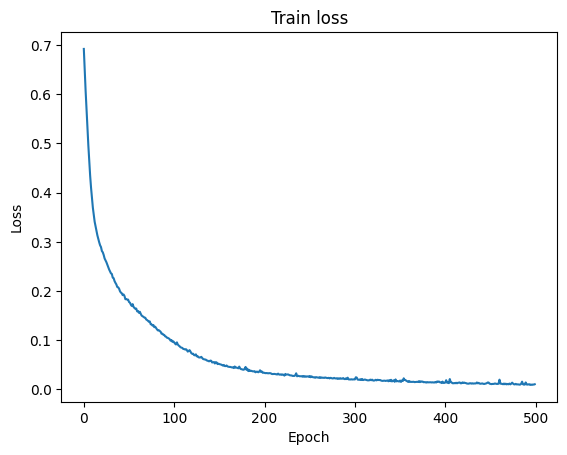

In [33]:
plot_history(history)

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [34]:
res = model.evaluate(X_test, y_test)
res[1]

3/3 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.9333


0.9333333373069763

In [35]:
accuracy_deep = res[1]

🧪 **Test your code**

In [36]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-your-first-neural-network/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_deeper_model.py::TestDeeperModel::test_accuracy PASSED              [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master



❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

1940/1940 [==============================] - 2s 926us/step


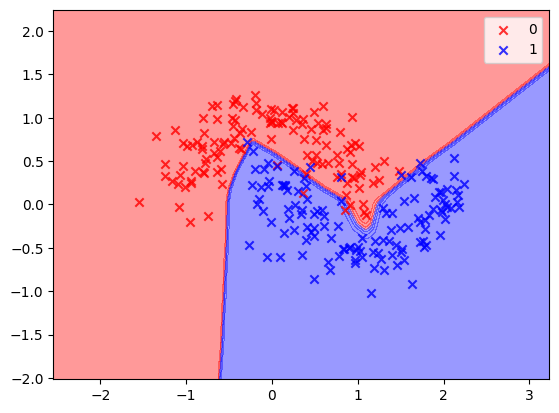

In [37]:
plot_decision_regions(X,y,model)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!